## Import modules

In [1]:
# Dataframes
import pandas as pd
import geopandas as gpd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns



## What we'll talk about today

Jupyter lab

- combination of markdown and executable code cells
- state preserving (makes iteration easy)

reading 'any' format into a few common datastructures - these are what we interact with during analyses.

- vector

- raster

- graph

## (Geo-)Dataframes

(geographic) tables / vector

objectives:

- import datasets
- understand structure (head, tail, shape, vector types (point, linestring, polygon, multilinestring/polygons, dtypes, crs (projection, reprojecting), data exploration (describe/min/max), plotting (color by column), filtering, new columns)
- query/index e.g. row selection
- merge/join. From pandas to geopandas. Work with dataframe, add geodataframe/ create geodataframe with sensor information

to-do: do I separate the gadm, with geometry as separate file?

tasks for students:

- import new dataset
- create new column, based on existing columns
- find max/min of a certain variable, maybe within a geographic area (admin area)? 
- simple plot with custom cmap?
- filter dataframe

Source: https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/kaart-van-500-meter-bij-500-meter-met-statistieken

Starting with gadm

Maybe still include: start with pandas dataframe, then add geometry


## Read in a file

In [2]:
admin = gpd.read_file('../data/raw_data/gadm41_NLD_2.json')

### Explore the dataframe

In [3]:
# The first few rows of the dataframe, or 'head'
admin.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,AaenHunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((6.56990 52.94650, 6.58990 52.9..."
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((6.64080 53.02570, 6.63920 53.0..."
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((6.74570 52.87920, 6.73630 52.9..."
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((6.87160 52.65300, 6.86450 52.6..."
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,DeWolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((6.27320 52.66810, 6.27640 52.6..."


In [4]:
# The end of the dataframe, or 'tail'
admin.tail()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
350,NLD.14.89_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoetermeer,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZR,"MULTIPOLYGON (((4.42360 52.05130, 4.41620 52.0..."
351,NLD.14.90_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoeterwoude,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZD,"MULTIPOLYGON (((4.55210 52.13850, 4.54780 52.1..."
352,NLD.14.104_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zuidplas,NA,NA,Gemeente,Municipality,NA,NA,"MULTIPOLYGON (((4.56690 52.05880, 4.60930 52.0..."
353,NLD.14.91_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zwijndrecht,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZW,"MULTIPOLYGON (((4.55540 51.83070, 4.56250 51.8..."
354,NLD.14.1_1,NLD,Netherlands,NLD.14_1,ZuidHollandseMeren,NA,ZuidHollandseMeren,NA,NA,Gemeente,Waterbody,NA,NA,"MULTIPOLYGON (((4.15760 51.68240, 4.16620 51.6..."


In [5]:
# Get a quick overview of dataframe structure with .shape
admin.shape

(355, 14)

## Projections

__The primary categories of map projections include:__

- Cylindrical Projections: These projections involve wrapping a cylinder around the Earth and projecting its features onto the cylindrical surface. Examples are the Mercator, Transverse Mercator, and Miller Cylindrical projections.
- Conic Projections: For these projections, a cone is placed over the Earth, and its features are projected onto the conical surface. Common examples are the Lambert Conformal Conic and Albers Equal-Area Conic projections.
- Azimuthal Projections: Also referred to as planar or zenithal projections, these use a flat plane that touches the Earth at a single point, projecting the Earth’s features onto the plane. Azimuthal Equidistant, Stereographic, and Orthographic projections are examples.
- Pseudocylindrical Projections: These projections resemble cylindrical projections but employ curved lines instead of straight lines for meridians and parallels. The Sinusoidal, Mollweide, and Goode Homolosine projections are popular examples.


__Map projections can also be classified based on the properties they maintain:__

- Equal-area (equivalent) projections: These projections preserve the correct proportions of areas, such as in the Albers Equal-Area Conic and Mollweide projections.
- Conformal (orthomorphic) projections: These projections maintain local angles and shapes, as seen in the Mercator and Lambert Conformal Conic projections.
- Equidistant projections: These projections retain true distances from one or two points to all other points, as in the Azimuthal Equidistant projection.
- Azimuthal projections: These projections preserve directions from a central point, including some conformal, orthomorphic, and azimuthal projections.
- Compromise projections: These projections attempt to balance various distortions inherent in map projections, such as the Robinson and Winkel Tripel projections.

__An example:__

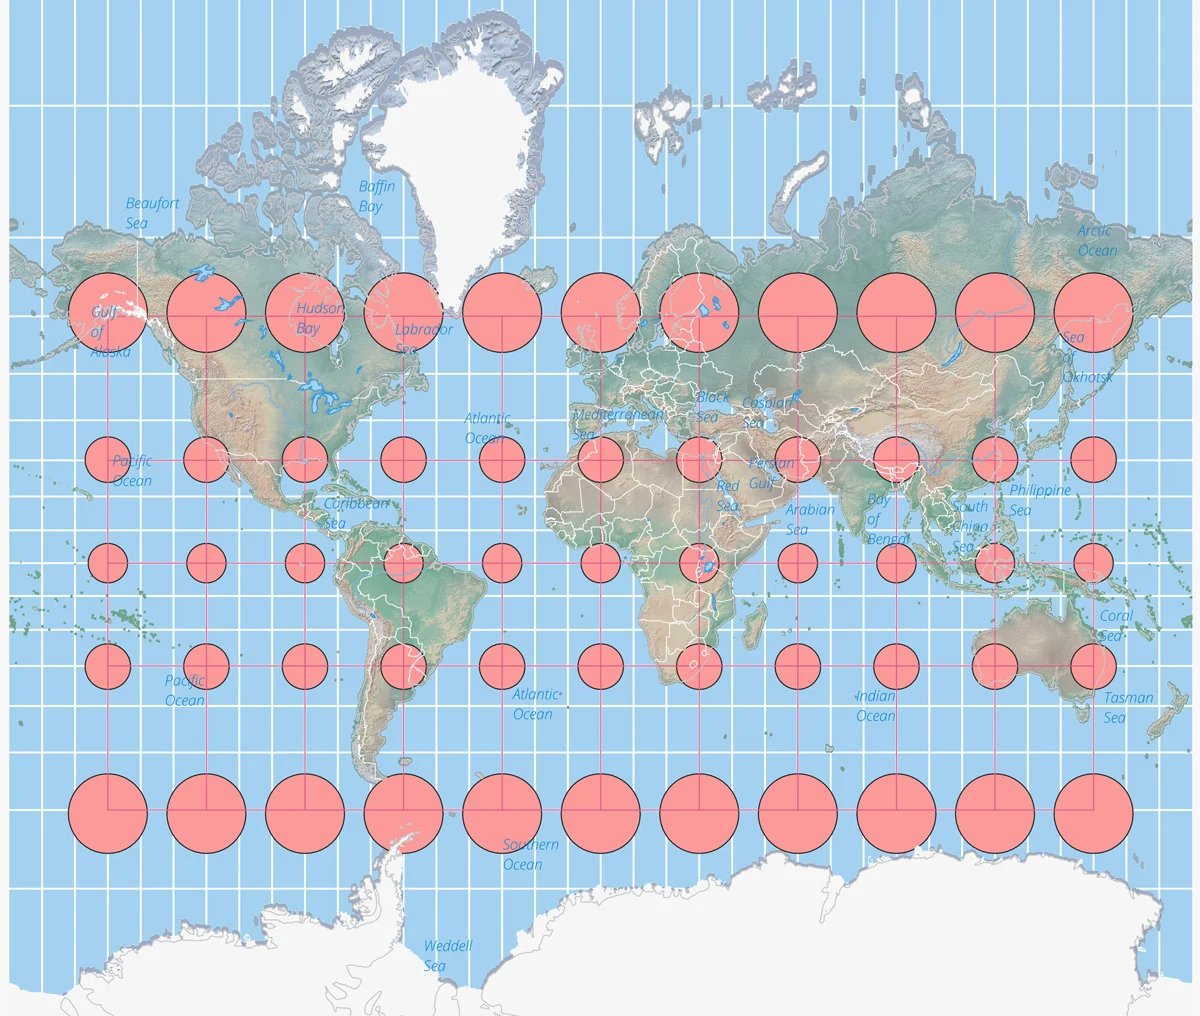

For more: https://www.geographyrealm.com/types-map-projections/

In [6]:
# use .crs to find out more about the coordinate reference system
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
print(admin.geometry[0])

MULTIPOLYGON (((6.5699 52.9465, 6.5899 52.967, 6.6049 52.9722, 6.6051 52.9794, 6.6127 52.9829, 6.6174 52.9891, 6.616 52.9945, 6.6223 53.0053, 6.6406 53.0176, 6.6422 53.0221, 6.6392 53.023, 6.6408 53.0257, 6.6573 53.0265, 6.6531 53.0391, 6.6502 53.0418, 6.6518 53.0454, 6.6626 53.0551, 6.6716 53.0559, 6.6732 53.0613, 6.6807 53.0649, 6.6734 53.0694, 6.6633 53.0802, 6.6588 53.0794, 6.6573 53.0821, 6.6664 53.0838, 6.6797 53.0801, 6.7019 53.07, 6.7078 53.0654, 6.7214 53.0698, 6.7229 53.0689, 6.7577 53.0811, 6.7578 53.0838, 6.7548 53.0847, 6.7578 53.0864, 6.7866 53.0942, 6.9465 52.9936, 6.8488 52.9777, 6.7899 52.9613, 6.7375 52.9547, 6.7414 52.9376, 6.7339 52.9377, 6.7363 52.9152, 6.7457 52.8792, 6.7245 52.8687, 6.6963 52.8753, 6.6838 52.905, 6.6764 52.9096, 6.6347 52.9127, 6.6244 52.9182, 6.5947 52.9193, 6.5743 52.9447, 6.5699 52.9465)))


In [8]:
# From polygon to point representation
admin["centroid"] = admin.geometry.centroid

/var/folders/qg/ghhvk02j7t3f3b9th5d2412rxxy23f/T/ipykernel_87389/2601124552.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  admin["centroid"] = admin.geometry.centroid


In [9]:
# In the Netherlands, generally use Amersfoort / RD New (EPSG:28992)
admin = admin.to_crs(28992)

In [10]:
admin.crs

<Derived Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [11]:
print(admin.geometry[0])

MULTIPOLYGON (((234495.02260361792 551702.3053670168, 235801.21434518188 554005.5611213, 236799.13368367584 554601.0703052117, 236799.04189901258 555402.4434981011, 237302.8401244887 555800.5343546048, 237606.6997498196 556495.7836545709, 237502.4606536811 557095.0428414718, 237904.8411044061 558303.9917172556, 239109.34376236208 559693.8134557916, 239207.99067761167 560196.4004824926, 239004.97124858544 560293.0458725601, 239107.09609690774 560595.3431787449, 240212.4792899824 560703.7299471128, 239906.1022869935 562100.7938700004, 239706.3448565559 562397.8165383054, 239806.62014579 562800.2753272211, 240511.74789049214 563892.3671717125, 241113.5433739261 563992.0959653446, 241210.09118659003 564594.8756873304, 241705.64915775883 565004.4480827803, 241207.41761540127 565496.4180746556, 240509.23951235006 566686.1317458821, 240209.29315177177 566591.7853024297, 240103.4921699601 566890.4500493357, 240709.84218718082 567090.3949839544, 241608.2977202499 566694.5821991322, 243116.27169

# Geographic features

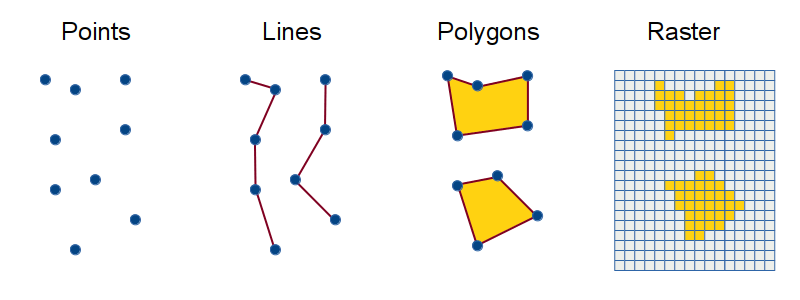

__Question:__ What kind of data do we have here?

<AxesSubplot:>

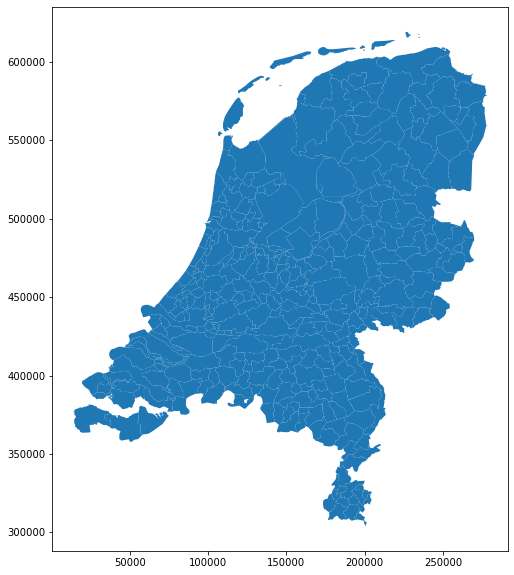

In [12]:
admin.plot(
    figsize=(10,10)
)

In [13]:
# From polygon to point representation
admin["centroid"] = admin.geometry.centroid

In [14]:
# The difference between Multipolygon and Point
print(f'Polygon: {admin.geometry[0]}')
print('------------------')
print(f'Point: {admin.centroid[0]}')

Polygon: MULTIPOLYGON (((234495.02260361792 551702.3053670168, 235801.21434518188 554005.5611213, 236799.13368367584 554601.0703052117, 236799.04189901258 555402.4434981011, 237302.8401244887 555800.5343546048, 237606.6997498196 556495.7836545709, 237502.4606536811 557095.0428414718, 237904.8411044061 558303.9917172556, 239109.34376236208 559693.8134557916, 239207.99067761167 560196.4004824926, 239004.97124858544 560293.0458725601, 239107.09609690774 560595.3431787449, 240212.4792899824 560703.7299471128, 239906.1022869935 562100.7938700004, 239706.3448565559 562397.8165383054, 239806.62014579 562800.2753272211, 240511.74789049214 563892.3671717125, 241113.5433739261 563992.0959653446, 241210.09118659003 564594.8756873304, 241705.64915775883 565004.4480827803, 241207.41761540127 565496.4180746556, 240509.23951235006 566686.1317458821, 240209.29315177177 566591.7853024297, 240103.4921699601 566890.4500493357, 240709.84218718082 567090.3949839544, 241608.2977202499 566694.5821991322, 243

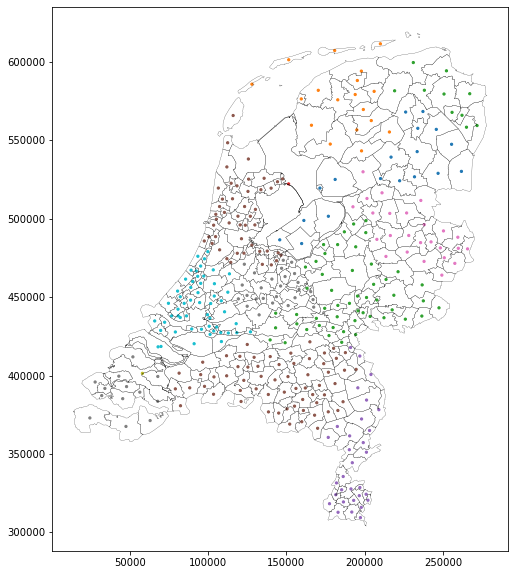

In [15]:
# Plot centroids
ax = admin.set_geometry("centroid").plot('NAME_1', 
                                         markersize=5, 
                                         figsize=(10,10))
# Plot polygons without color filling
admin.plot('NAME_1',
           ax=ax, 
           facecolor="none", 
           edgecolor="k", 
           linewidth=0.2,
);

## Filter rows by index / attribute

__loc and iloc__

With loc and iloc you can do practically any data selection operation on DataFrames you can think of. 

- loc is label-based, which means that you have to specify rows and columns based on their row and column labels. 

- iloc is integer index based, so you have to specify rows and columns by their integer 

The main distinction between the two methods is:

- loc gets rows (and/or columns) with particular labels.

- iloc gets rows (and/or columns) at integer locations.


In [18]:
admin.iloc[0]

GID_2                                                NLD.1.1_1
GID_0                                                      NLD
COUNTRY                                            Netherlands
GID_1                                                  NLD.1_1
NAME_1                                                 Drenthe
NL_NAME_1                                                   NA
NAME_2                                               AaenHunze
VARNAME_2                                                   NA
NL_NAME_2                                                   NA
TYPE_2                                                Gemeente
ENGTYPE_2                                         Municipality
CC_2                                                        NA
HASC_2                                                NL.DR.AH
geometry     (POLYGON ((234495.02260361792 551702.305367016...
centroid            POINT (245622.559373846 557075.2367336631)
Name: 0, dtype: object

In [19]:
admin.iloc[12:20]

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid
12,NLD.2.1_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Almere,NA,NA,Gemeente,Municipality,NA,NL.FL.AL,"MULTIPOLYGON (((152821.854 490296.335, 152522....",POINT (145733.407 486577.233)
13,NLD.2.2_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Dronten,NA,NA,Gemeente,Municipality,NA,NL.FL.DR,"MULTIPOLYGON (((169091.021 491506.578, 169089....",POINT (176755.147 501639.430)
14,NLD.2.3_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Lelystad,NA,NA,Gemeente,Municipality,NA,NL.FL.LE,"MULTIPOLYGON (((152556.479 490396.598, 151617....",POINT (161117.314 498954.337)
15,NLD.2.4_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Noordoostpolder,NA,NA,Gemeente,Municipality,NA,NL.FL.NO,"MULTIPOLYGON (((171950.870 516451.055, 172592....",POINT (181090.557 525129.634)
16,NLD.2.5_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Urk,NA,NA,Gemeente,Municipality,NA,NL.FL.UR,"MULTIPOLYGON (((169263.609 520982.402, 169561....",POINT (171372.558 519621.484)
17,NLD.2.6_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Zeewolde,NA,NA,Gemeente,Municipality,NA,NL.FL.ZE,"MULTIPOLYGON (((150525.370 479505.225, 151631....",POINT (159706.410 484215.541)
18,NLD.3.1_1,NLD,Netherlands,NLD.3_1,Fryslân,NA,Achtkarspelen,NA,NA,Gemeente,Municipality,NA,NL.FR.AC,"MULTIPOLYGON (((197621.244 583924.268, 197719....",POINT (205961.406 581333.258)
19,NLD.3.2_1,NLD,Netherlands,NLD.3_1,Fryslân,NA,Ameland,NA,NA,Gemeente,Municipality,NA,NL.FR.AM,"MULTIPOLYGON (((174058.015 609515.934, 175015....",POINT (180785.221 607410.234)


In [23]:
admin.loc[admin['NAME_1'] == 'Flevoland']

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid
12,NLD.2.1_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Almere,NA,NA,Gemeente,Municipality,NA,NL.FL.AL,"MULTIPOLYGON (((152821.854 490296.335, 152522....",POINT (145733.407 486577.233)
13,NLD.2.2_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Dronten,NA,NA,Gemeente,Municipality,NA,NL.FL.DR,"MULTIPOLYGON (((169091.021 491506.578, 169089....",POINT (176755.147 501639.430)
14,NLD.2.3_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Lelystad,NA,NA,Gemeente,Municipality,NA,NL.FL.LE,"MULTIPOLYGON (((152556.479 490396.598, 151617....",POINT (161117.314 498954.337)
15,NLD.2.4_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Noordoostpolder,NA,NA,Gemeente,Municipality,NA,NL.FL.NO,"MULTIPOLYGON (((171950.870 516451.055, 172592....",POINT (181090.557 525129.634)
16,NLD.2.5_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Urk,NA,NA,Gemeente,Municipality,NA,NL.FL.UR,"MULTIPOLYGON (((169263.609 520982.402, 169561....",POINT (171372.558 519621.484)
17,NLD.2.6_1,NLD,Netherlands,NLD.2_1,Flevoland,NA,Zeewolde,NA,NA,Gemeente,Municipality,NA,NL.FL.ZE,"MULTIPOLYGON (((150525.370 479505.225, 151631....",POINT (159706.410 484215.541)


vs

In [ ]:
admin.loc[admin.NAME_1

In [33]:
# Get unique values of a column
admin.NAME_1.unique()

array(['Drenthe', 'Flevoland', 'Fryslân', 'Gelderland', 'Groningen',
       'IJsselmeer', 'Limburg', 'Noord-Brabant', 'Noord-Holland',
       'Overijssel', 'Utrecht', 'Zeeland', 'Zeeuwsemeren', 'Zuid-Holland',
       'ZuidHollandseMeren'], dtype=object)

In [24]:
# How to query:
admin.loc[admin.NAME_1 == 'Noord-Holland']

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid
190,NLD.9.1_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Aalsmeer,NA,NA,Gemeente,Municipality,NA,NL.NH.AA,"MULTIPOLYGON (((115789.705 479870.026, 116690....",POINT (112004.387 474548.846)
191,NLD.9.66_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Alkmaar,NA,NA,Gemeente,Municipality,NA,NL.NH.AL,"MULTIPOLYGON (((123988.103 513337.388, 123183....",POINT (115586.648 512786.342)
192,NLD.9.3_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Amstelveen,NA,NA,Gemeente,Municipality,NA,NL.NH.AV,"MULTIPOLYGON (((114787.476 474882.155, 116690....",POINT (118630.186 478020.701)
193,NLD.9.4_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Amsterdam,NA,NA,Gemeente,Municipality,NA,NL.NH.AD,"MULTIPOLYGON (((129959.176 481869.765, 130342....",POINT (121311.987 487284.923)
194,NLD.9.7_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Beemster,NA,NA,Gemeente,Municipality,NA,NL.NH.BM,"MULTIPOLYGON (((117670.855 505736.912, 117768....",POINT (123292.721 507842.356)
195,NLD.9.9_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Bergen,NA,NA,Gemeente,Municipality,NA,NL.NH.BG,"MULTIPOLYGON (((111434.334 521611.780, 112236....",POINT (106537.058 519633.588)
196,NLD.9.10_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Beverwijk,NA,NA,Gemeente,Municipality,NA,NL.NH.BV,"MULTIPOLYGON (((100737.131 501610.656, 101911....",POINT (105293.189 499756.979)
197,NLD.9.11_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Blaricum,NA,NA,Gemeente,Municipality,NA,NL.NH.BC,"MULTIPOLYGON (((148519.310 478906.621, 148819....",POINT (146520.288 476812.016)
198,NLD.9.12_2,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Bloemendaal,NA,NA,Gemeente,Municipality,NA,NL.NH.BL,"MULTIPOLYGON (((97363.103 490677.184, 98335.02...",POINT (100503.268 488509.956)
199,NLD.9.14_1,NLD,Netherlands,NLD.9_1,Noord-Holland,NA,Castricum,NA,NA,Gemeente,Municipality,NA,NL.NH.CA,"MULTIPOLYGON (((112145.936 511724.101, 112443....",POINT (107318.549 507835.529)


GID_2                                                NLD.9.4_1
GID_0                                                      NLD
COUNTRY                                            Netherlands
GID_1                                                  NLD.9_1
NAME_1                                           Noord-Holland
NL_NAME_1                                                   NA
NAME_2                                               Amsterdam
VARNAME_2                                                   NA
NL_NAME_2                                                   NA
TYPE_2                                                Gemeente
ENGTYPE_2                                         Municipality
CC_2                                                        NA
HASC_2                                                NL.NH.AD
geometry     (POLYGON ((129959.1763056073 481869.7654918253...
centroid          POINT (121311.98662234996 487284.9226590751)
Name: 193, dtype: object


/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
/opt/anaconda

<AxesSubplot:>

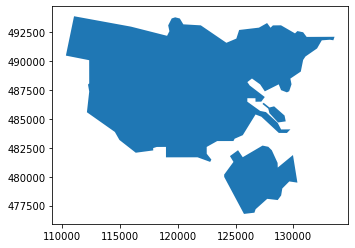

In [41]:
# Save a new variable to subset the dataframe
amsterdam = admin.loc[admin.NAME_2 == 'Amsterdam']
print(amsterdam.iloc[0])
amsterdam.plot()

## Overlay functions

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the GeoPandas library through the overlay() method.

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the left GeoDataFrame, this operation is executed against every other shape in the right GeoDataFrame:

Source: https://geopandas.org/en/stable/docs/user_guide/set_operations.html

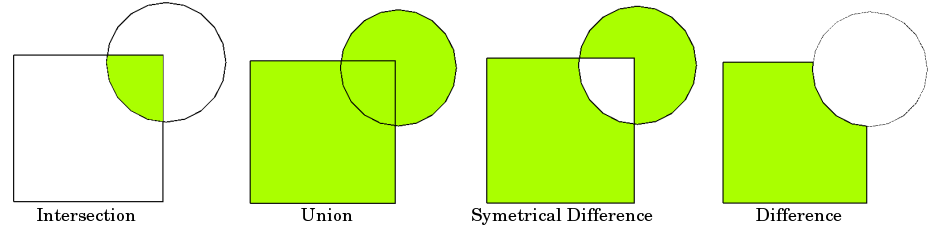

Import sensor dataset

In [30]:
sensors = gpd.read_file('../data/raw_data/samenmeten.json')
sensors.head()

,id_x,name_x,name_thing,codegemeente,knmicode,nh3closecode,nh3regiocode,nh3stadcode,no2closecode,no2regiocode,...,pm10stadcode,pm25closecode,pm25regiocode,pm25stadcode,project,id_y,name_y,gemeentecode,random,geometry
0,25430,loc-name-HLL_hl_device_539,HLL_hl_device_539,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NL10550,NL49703,NL49703,NL49007,Hollandse Luchten,7976,HLL_hl_device_539,None,3,POINT (105078.461 488378.701)
1,25429,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,5,POINT (117123.161 496282.980)
2,25391,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,1,POINT (117926.306 494607.807)
3,25133,loc-name-HLL_hl_device_356,HLL_hl_device_356,479,knmi_06240,NL10633,NL10633,None,NL49546,NL49703,...,NL49007,NL49701,NL49703,NL49007,Hollandse Luchten,7858,HLL_hl_device_356,None,4,POINT (116869.365 498621.637)
4,25428,loc-name-LUC_354724647886677,LUC_354724647886677,599,knmi_06344,NL10444,NL10444,None,NL10418,NL10437,...,NL01487,NL10418,NL10444,NL01487,Luchtclub,6028,LUC_354724647886677,None,3,POINT (92982.613 435550.661)


Question: How many sensors do we have? What function do we use?

In [34]:
sensors.shape

(13725, 24)

Question: If we'd like to plot the dataframe, how do we do that?

<AxesSubplot:>

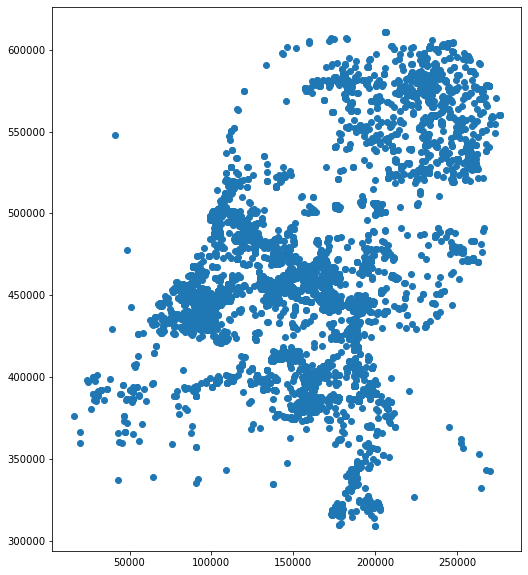

In [60]:
sensors.plot(figsize=(10,10))

In [35]:
intersection = gpd.overlay(sensors, admin, how='intersection')

In [36]:
intersection.head()

,id_x,name_x,name_thing,codegemeente,knmicode,nh3closecode,nh3regiocode,nh3stadcode,no2closecode,no2regiocode,...,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,centroid,geometry
0,25430,loc-name-HLL_hl_device_539,HLL_hl_device_539,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (105078.461 488378.701)
1,25382,loc-name-HLL_hl_device_458,HLL_hl_device_458,392,knmi_06240,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (105178.706 484816.982)
2,25379,loc-name-GLBPB_105-040,GLBPB_105-040,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (103167.404 487953.318)
3,25176,loc-name-HLL_hl_device_537,HLL_hl_device_537,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (102961.957 487844.207)
4,25125,loc-name-HLL_hl_device_537,HLL_hl_device_537,392,knmi_06225,NL10444,NL10444,None,NL10550,NL49703,...,NA,Haarlem,NA,NA,Gemeente,Municipality,NA,NL.NH.HA,POINT (104781.086 488635.680),POINT (102961.957 487844.207)


In [86]:
admin_counts = intersection.groupby('NAME_2').size().reset_index(name='sensor_count')

In [87]:
admin_counts.sort_values(by='sensor_count', ascending=False)

,NAME_2,sensor_count
240,Rotterdam,2233
193,Nijmegen,957
162,Leidschendam-Voorburg,716
291,Venray,491
63,DeBilt,388
...,...,...
141,Huizen,1
294,Vlieland,1
127,Hendrik-Ido-Ambacht,1
106,Grave,1


In [88]:
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].max()]


,NAME_2,sensor_count
240,Rotterdam,2233


In [89]:
admin_counts[admin_counts['sensor_count'] == admin_counts['sensor_count'].min()]


,NAME_2,sensor_count
10,Alphen-Chaam,1
21,Baarle-Nassau,1
25,Beek,1
29,Bergeijk,1
34,Bernheze,1
58,Cranendonck,1
61,Dalfsen,1
73,Doesburg,1
82,Edam-Volendam,1
106,Grave,1


In [90]:
admin_counts['sensor_count'].mean()

40.57566765578635

What is the min?
What is the mean?

What is the municipality with the most sensors?
Which municipality is closest to the mean?

join on NAME_1 -> then plot by count?

Also for exercise, should this be 

In [91]:
# Merge the DataFrames using the 'Key' column
merged_df = pd.merge(admin, admin_counts, on='NAME_2', how='outer')

# 'how' parameter specifies the type of merge:
# - 'inner' (default): Keeps only the common values in both DataFrames
# - 'left': Keeps all values from the left DataFrame and only common values from the right DataFrame
# - 'right': Keeps all values from the right DataFrame and only common values from the left DataFrame
# - 'outer': Keeps all values from both DataFrames, filling missing values with NaN

In [92]:
merged_df

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,centroid,sensor_count
0,NLD.1.1_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,AaenHunze,NA,NA,Gemeente,Municipality,NA,NL.DR.AH,"MULTIPOLYGON (((234495.023 551702.305, 235801....",POINT (245622.559 557075.237),38.0
1,NLD.1.2_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Assen,NA,NA,Gemeente,Municipality,NA,NL.DR.AS,"MULTIPOLYGON (((239107.096 560595.343, 239004....",POINT (233827.147 557762.869),32.0
2,NLD.1.3_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Borger-Odoorn,NA,NA,Gemeente,Municipality,NA,NL.DR.BO,"MULTIPOLYGON (((246451.501 544422.207, 245743....",POINT (255381.222 547561.354),29.0
3,NLD.1.4_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,Coevorden,NA,NA,Gemeente,Municipality,NA,NL.DR.CO,"MULTIPOLYGON (((255443.223 519422.409, 254969....",POINT (246762.103 529038.492),41.0
4,NLD.1.5_1,NLD,Netherlands,NLD.1_1,Drenthe,NA,DeWolden,NA,NA,Gemeente,Municipality,NA,NL.DR.DW,"MULTIPOLYGON (((214933.132 520438.735, 215142....",POINT (222237.379 524277.954),22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,NLD.14.89_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoetermeer,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZR,"MULTIPOLYGON (((88904.526 451881.687, 88406.19...",POINT (93569.119 452878.450),51.0
351,NLD.14.90_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zoeterwoude,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZD,"MULTIPOLYGON (((97829.907 461473.887, 97529.75...",POINT (95297.212 458829.996),2.0
352,NLD.14.104_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zuidplas,NA,NA,Gemeente,Municipality,NA,NA,"MULTIPOLYGON (((98742.870 452595.358, 101658.4...",POINT (101660.762 445950.806),54.0
353,NLD.14.91_1,NLD,Netherlands,NLD.14_1,Zuid-Holland,NA,Zwijndrecht,NA,NA,Gemeente,Municipality,NA,NL.ZH.ZW,"MULTIPOLYGON (((97663.745 427227.815, 98163.35...",POINT (101278.978 426265.004),3.0


<AxesSubplot:>

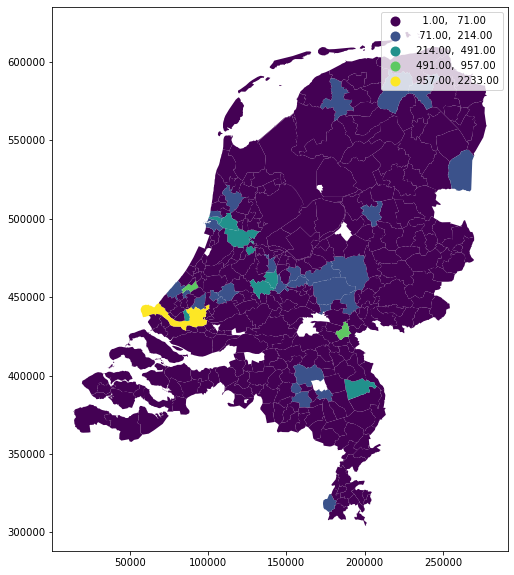

In [95]:
merged_df.plot('sensor_count',
               legend=True,
               figsize=(10,10), 
               scheme='NaturalBreaks')

## Tasks:

- filter gadm dataset (Zuid-holland)
- 

What the students should do:
- load wijk dataset for zuid-holland
- What municipality is row x, y, z?
- 10 last rows, instead of 5 - can adapt tail!

- repeat the steps
- find the wijk with most sensors, any explanations?

serve the wijk dataset in different projection - projection issues.


Making a map